In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kandij/mall-customers")

print("Path to dataset files:", path)

100%|██████████| 1.56k/1.56k [00:00<?, ?B/s]

Extracting model files...
Path to dataset files: C:\Users\OMEN\.cache\kagglehub\datasets\kandij\mall-customers\versions\1


In [3]:
# Setup: libraries, style, configuration
import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Customized input path
INPUT_CSV = r"C:\Users\OMEN\Desktop\MIndeousProject\Project-2\Mall_Customers.csv"
RANDOM_STATE = 42

assert os.path.exists(INPUT_CSV), f"File not found: {INPUT_CSV}"


In [4]:
# Load Mall Customer dataset
df = pd.read_csv(INPUT_CSV)

# Drop CustomerID if present
if "CustomerID" in df.columns:
    df = df.drop(columns=["CustomerID"])

print("Shape:", df.shape)
print("\nFirst 10 rows:")
display(df.head(10))
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
display(df.describe())
print("\nMissing values:")
print(df.isnull().sum())


Shape: (200, 4)

First 10 rows:


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72



Data types:
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Basic statistics:


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000



Missing values:
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Select key features for clustering: Age, Annual Income, Spending Score
# Encode Gender if needed (optional - can include or exclude)
if "Gender" in df.columns:
    df["Gender_enc"] = df["Gender"].map({"Male": 1, "Female": 0})

# Define features for clustering
# Option 1: Age, Income, Spending Score only
feature_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Option 2: Include Gender if desired
# feature_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_enc"]

X = df[feature_cols].copy()

print("Selected features:", feature_cols)
print("Feature matrix shape:", X.shape)
display(X.head())


Selected features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Feature matrix shape: (200, 3)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)
print("\nScaled data sample (first 5 rows):")
print(X_scaled[:5])


Scaled data shape: (200, 3)

Scaled data sample (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


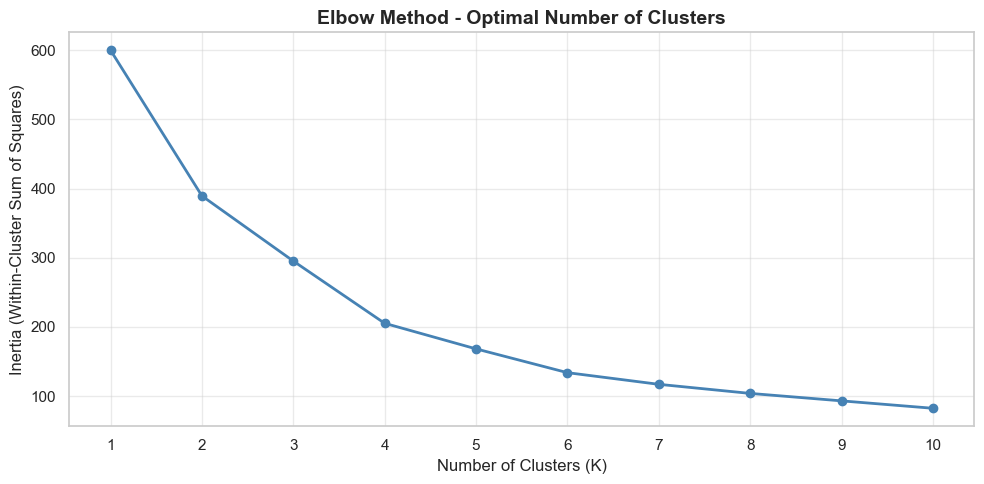

Inertia values: [600.0, 389.3861889564372, 295.2122461555488, 205.22514747675916, 168.24758017556834, 133.86842085478852, 117.01155455889811, 103.87329152383714, 93.09289110041726, 82.38515364526599]


In [7]:
# Elbow Method: compute inertia for K in range 1-10
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(list(k_range), inertias, marker="o", linestyle="-", color="steelblue", linewidth=2)
plt.title("Elbow Method - Optimal Number of Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Within-Cluster Sum of Squares)", fontsize=12)
plt.xticks(list(k_range))
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

print("Inertia values:", inertias)


K=2: Silhouette Score = 0.3355
K=3: Silhouette Score = 0.3578
K=4: Silhouette Score = 0.4040
K=5: Silhouette Score = 0.4166
K=6: Silhouette Score = 0.4284
K=7: Silhouette Score = 0.4172
K=8: Silhouette Score = 0.4082
K=9: Silhouette Score = 0.4177
K=10: Silhouette Score = 0.4066


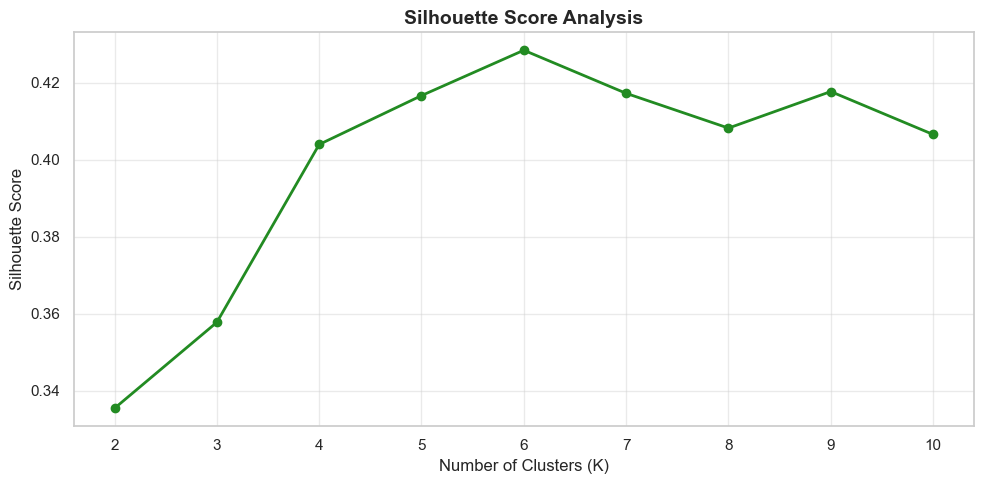


Optimal K by Silhouette Score: 6 (Score=0.4284)


In [8]:
# Silhouette Score for K in range 2-10
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-", color="forestgreen", linewidth=2)
plt.title("Silhouette Score Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(range(2, 11))
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Best K by silhouette score
best_k = range(2, 11)[int(np.argmax(silhouette_scores))]
print(f"\nOptimal K by Silhouette Score: {best_k} (Score={max(silhouette_scores):.4f})")


In [9]:
# Choose optimal K (commonly 5 for Mall Customers based on elbow + silhouette)
OPTIMAL_K = 5  # adjust based on elbow/silhouette analysis

# Fit K-Means
kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=RANDOM_STATE, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df["Cluster"] = cluster_labels

print(f"\nFitted K-Means with K={OPTIMAL_K}")
print("\nCluster distribution:")
print(df["Cluster"].value_counts().sort_index())



Fitted K-Means with K=5

Cluster distribution:
Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


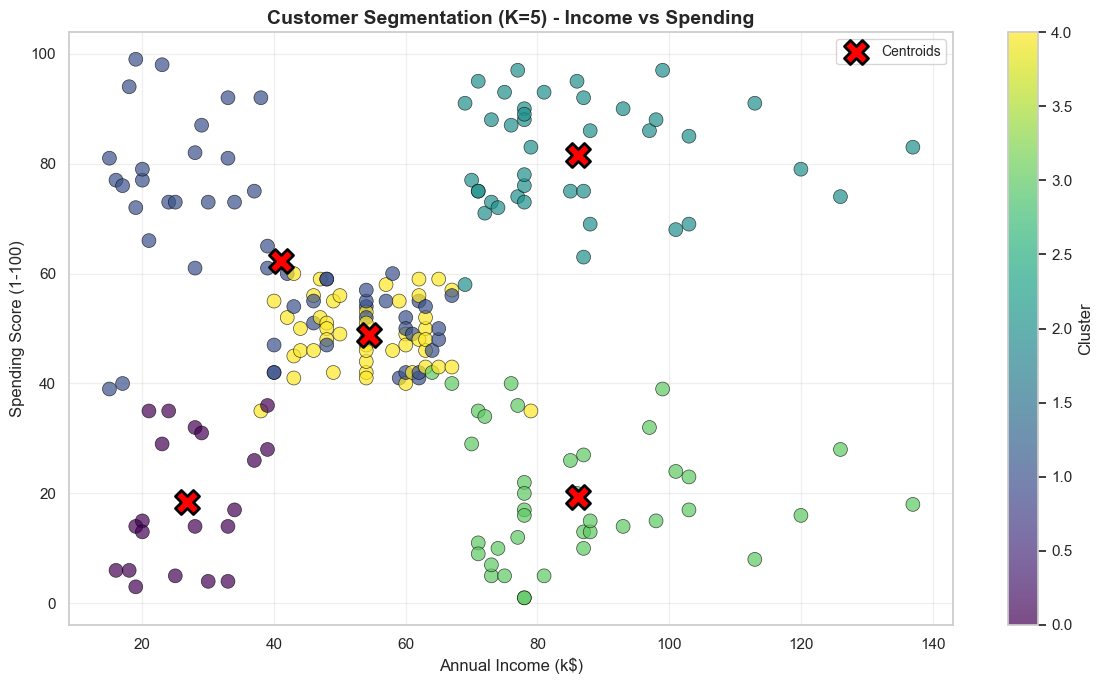

In [10]:
# 2D Visualization: Annual Income vs Spending Score
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap="viridis",
    s=100,
    edgecolor="black",
    alpha=0.7,
    linewidth=0.5
)

# Plot centroids (inverse transform to original scale)
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(
    centroids_original[:, feature_cols.index("Annual Income (k$)")],
    centroids_original[:, feature_cols.index("Spending Score (1-100)")],
    c="red",
    s=300,
    marker="X",
    edgecolor="black",
    linewidth=2,
    label="Centroids"
)

plt.title(f"Customer Segmentation (K={OPTIMAL_K}) - Income vs Spending", fontsize=14, fontweight='bold')
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.colorbar(scatter, label="Cluster")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


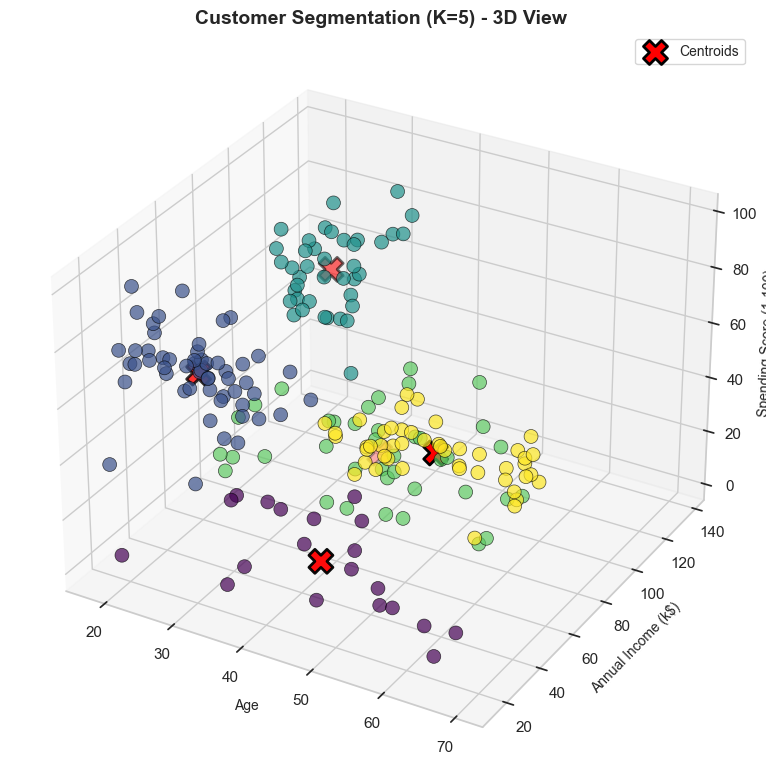

In [11]:
# 3D Visualization: Age, Income, Spending Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter_3d = ax.scatter(
    df["Age"],
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap="viridis",
    s=100,
    edgecolor="black",
    alpha=0.7,
    linewidth=0.5
)

# Plot centroids in 3D
ax.scatter(
    centroids_original[:, feature_cols.index("Age")],
    centroids_original[:, feature_cols.index("Annual Income (k$)")],
    centroids_original[:, feature_cols.index("Spending Score (1-100)")],
    c="red",
    s=300,
    marker="X",
    edgecolor="black",
    linewidth=2,
    label="Centroids"
)

ax.set_title(f"Customer Segmentation (K={OPTIMAL_K}) - 3D View", fontsize=14, fontweight='bold')
ax.set_xlabel("Age", fontsize=10)
ax.set_ylabel("Annual Income (k$)", fontsize=10)
ax.set_zlabel("Spending Score (1-100)", fontsize=10)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


In [12]:
# Cluster profiling: mean characteristics per cluster
cluster_profiles = df.groupby("Cluster")[feature_cols].mean()
print("\nCluster Profiles (Mean Values):")
display(cluster_profiles)

# Assign meaningful labels based on characteristics
# Example interpretation (adjust based on actual results):
cluster_labels_dict = {
    0: "Budget-Conscious Shoppers",
    1: "High Earners, Low Spenders",
    2: "Loyal High-Spenders",
    3: "Mid-Range Customers",
    4: "Young, Low Income"
}

df["Cluster_Label"] = df["Cluster"].map(cluster_labels_dict)

print("\nCluster Labels:")
print(df[["Cluster", "Cluster_Label"]].drop_duplicates().sort_values("Cluster"))

# Show sample customers from each cluster
print("\nSample customers per cluster:")
for cluster_id in sorted(df["Cluster"].unique()):
    print(f"\n--- Cluster {cluster_id}: {cluster_labels_dict.get(cluster_id, 'Unknown')} ---")
    display(df[df["Cluster"] == cluster_id].head(3))



Cluster Profiles (Mean Values):


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064



Cluster Labels:
     Cluster               Cluster_Label
2          0   Budget-Conscious Shoppers
0          1  High Earners, Low Spenders
122        2         Loyal High-Spenders
112        3         Mid-Range Customers
40         4           Young, Low Income

Sample customers per cluster:

--- Cluster 0: Budget-Conscious Shoppers ---


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
2,Female,20,16,6,0,Budget-Conscious Shoppers
6,Female,35,18,6,0,Budget-Conscious Shoppers
8,Male,64,19,3,0,Budget-Conscious Shoppers



--- Cluster 1: High Earners, Low Spenders ---


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
0,Male,19,15,39,1,"High Earners, Low Spenders"
1,Male,21,15,81,1,"High Earners, Low Spenders"
3,Female,23,16,77,1,"High Earners, Low Spenders"



--- Cluster 2: Loyal High-Spenders ---


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
122,Female,40,69,58,2,Loyal High-Spenders
123,Male,39,69,91,2,Loyal High-Spenders
125,Female,31,70,77,2,Loyal High-Spenders



--- Cluster 3: Mid-Range Customers ---


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
112,Female,38,64,42,3,Mid-Range Customers
121,Female,38,67,40,3,Mid-Range Customers
124,Female,23,70,29,3,Mid-Range Customers



--- Cluster 4: Young, Low Income ---


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
40,Female,65,38,35,4,"Young, Low Income"
46,Female,50,40,55,4,"Young, Low Income"
50,Female,49,42,52,4,"Young, Low Income"


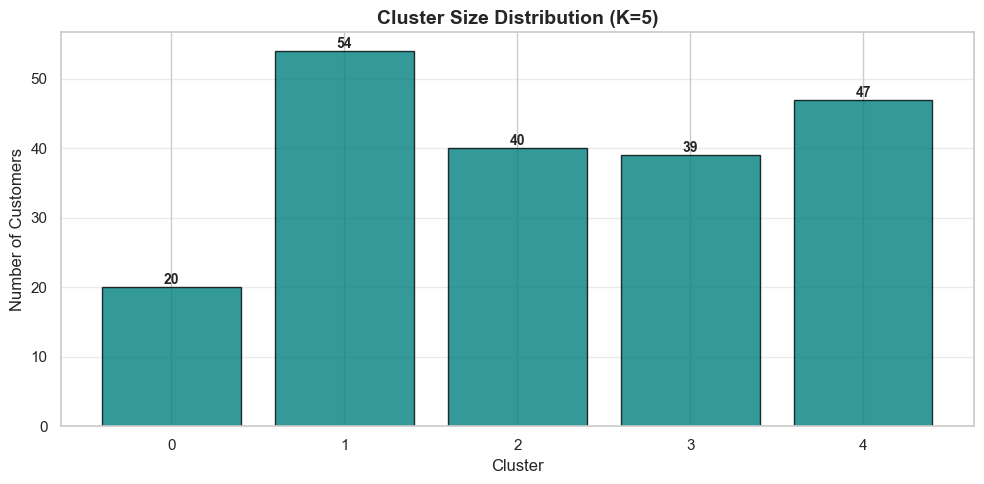

In [13]:
# Bar chart of cluster sizes
cluster_counts = df["Cluster"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color="teal", edgecolor="black", alpha=0.8)
plt.title(f"Cluster Size Distribution (K={OPTIMAL_K})", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(cluster_counts.index)
plt.grid(axis='y', alpha=0.4)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
